avg degree  43.701832590391284
avg path length  3.694336181799288
diameter  8
avg clustering coeff  0.60725
difference is large between between total number of edges possible 8150703.0 and edges in the graph  176468 therefore network is sparsed


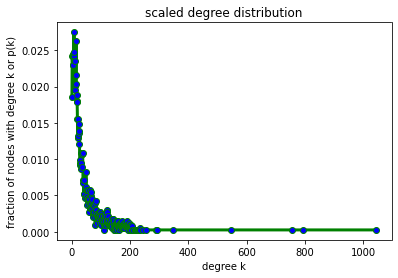

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#data : facebook-ego
#######################################################################################
#ouput of this data takes some time as it ios large data
#####################################################################################
#   A) matrix creation and adjacenecy list creation code
f=open('facebook_combined.txt','r')
data=f.readlines()
src=[]
dst=[]
for i in data:
    l=i.split(" ")
    src.append(int(l[0]))      
    dst.append(int(l[1]))
f.close()
m=max(max(src),max(dst))
arr=[[0]*(m+1)]*(m+1)
for i in range(0,len(src)):      #matrix   creation
    arr[src[i]][dst[i]]=1        #matrix is not dispalyed as it is very large 
    arr[dst[i]][src[i]]=1
    
d={}
for i in src:
    d[i]=[]
for i in dst:
    d[i]=[]
    
for i in range(0,len(src)):       #adjacenecy list creation
    d[src[i]].append(dst[i])
    d[dst[i]].append(src[i])


# code for (E part plotting) ----------------->
ldistribution=[]
for i in d:
    ldistribution.append(len(d[i]))
lfrequency={}
for i in ldistribution:            # calculating frequency for each node with degree k
    if(i in lfrequency):
        lfrequency[i]=lfrequency[i]+1
    else:
        lfrequency[i]=1
        
for i in lfrequency:
    lfrequency[i]=lfrequency[i]/m   #m is total no. of nodes
f={}
for i in sorted(lfrequency.keys()):  #sorting for graph
    f[i]=lfrequency[i]
    
#plotting the graph
plt.plot(list(f.keys()),list(f.values()),color='green', linestyle='solid', linewidth = 3, marker='o', markerfacecolor='blue', markersize=6)
plt.title('scaled degree distribution')
plt.xlabel('degree k')
plt.ylabel('fraction of nodes with degree k or p(k)')
#plt.show()

#code for average degree (c part)---------->

degree=0
for i in d:
    degree+=len(d[i])
print("avg degree ",degree/m)

#finding the avg path length   (f part)----------->
#shortest path

def path(graph, start,m):  
    queue = [start]
    distance=[-1]*(m+1)
    distance[start]=0;
    while queue:
        src=queue.pop(0)
        for neighbour in graph[src]:
            if(distance[neighbour]==-1):
                distance[neighbour] = distance[src] + 1
                queue.append(neighbour)
    return distance


paths=[]
su=0
for i in d.keys():
    s=0
    ll=path(d,i,m)
    for i in ll:
        s+=i
    su+=s
ans=su/(m*(m-1))
print("avg path length ",ans)   # printing avg path length


#code to find the maximum diameter   (F part) ---------------->
maxd=0
for i in d.keys():
    ll=path(d,i,m)
    for i in ll:
        maxd=max(maxd,i)
print("diameter ",maxd)  #diameter


# function to find the average clustering coefficient  (F part)----->
def avg_clustering(m,d):
    ans= 0
    run=4000
    for i in [int(random.random() * m) for i in range(run)]: 
        nbrs = d[i] 
        if len(nbrs) < 2: 
            continue
        u, v = random.sample(nbrs, 2) 
        if u in d[v]: 
            ans += 1
    return ans / float(run)
#printing the avg. coeff. here
print("avg clustering coeff ",avg_clustering(m,d))  



#checking the sparseness of the graph( C part )  ------->
spar=(m*(m-1))/2
edges=len(src)*2
print("difference is large between between total number of edges possible" , spar,"and edges in the graph ",edges,"therefore network is sparsed")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

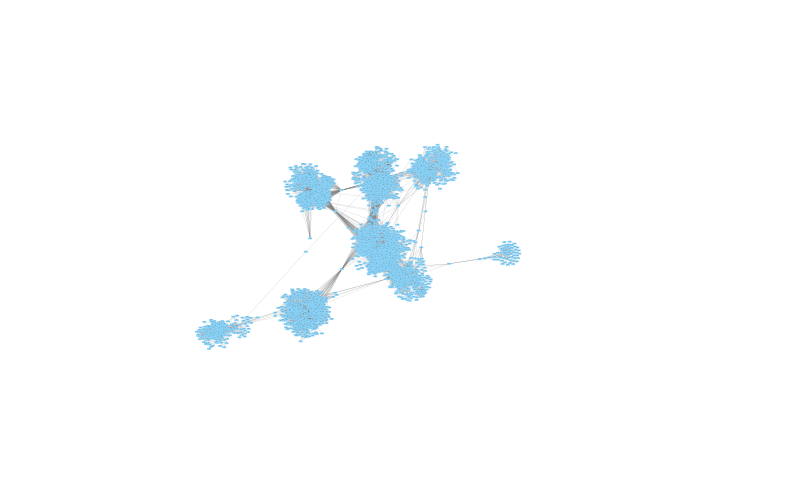

In the matrix value is 1 if there is a edge in between u and v.
so when a edge comes i put 1 at arr[u][v]=1 and to make it undirected also at arr[v][u].similary i used dictionary to create the adjacency list where key is the node and value is the list containing its neighbouring node.
bfs is used to find the shortest from one node to all other node,i named this function path this function returns a list of shortest path from one node to all other paths.similarly to find the diameter i just find the maximum value returned by the path function

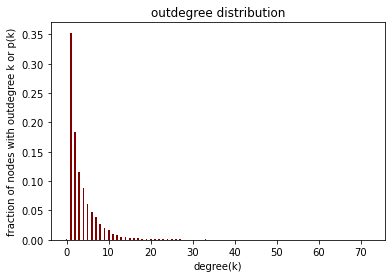

In [ ]:
#question2 (amazon directed graph) #indegree plot
import pandas as pd
amazond=pd.read_csv('p2p.csv')
src=list(amazond['source'])
dst=list(amazond['destination'])
mmax=max(max(src),max(dst))
idegrees={}
odegree={}
for i in src:
    idegrees[i]=0
    odegree[i]=0
for i in dst:
    idegrees[i]=0
    odegree[i]=0
for i in range(0,len(src)):
    odegree[src[i]]=1+odegree[src[i]]
    idegrees[dst[i]]=1+idegrees[dst[i]]

l=list(idegrees.values())
ll=list(odegree.values())
freqi={}
freqo={}
for i in l:
    if(i in freqi):
        freqi[i]+=1
    else:
        freqi[i]=1
for i in ll:
    if(i in freqo):
        freqo[i]+=1
    else:
        freqo[i]=1
for i in freqi:
    freqi[i]=freqi[i]/mmax
for i in freqo:
    freqo[i]=freqo[i]/mmax
k=list(freqi.keys())
v=list(freqi.values())
plt.bar(k, v, color ='maroon',width = 0.4)
plt.xlabel("degree(k)") 
plt.ylabel("fraction of nodes with outdegree k or p(k)") 
plt.title("outdegree distribution") 
plt.show() 

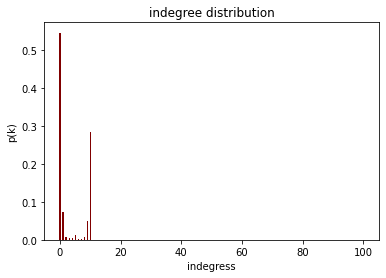

In [ ]:
#outdegree plot
kk=list(freqo.keys())
vv=list(freqo.values())
plt.bar(kk, vv, color ='maroon',width = 0.4)
plt.xlabel("indegress") 
plt.ylabel("fraction of nodes with indegree k or p(k)") 
plt.title("indegree distribution") 
plt.show() 

  The edge coming towards or directed towards the node is counted in the indegree.
  The edge going away from node or directed outward from the node is counted as outdegree of the node.
so, when there is a edge i increased the indegree and outdegree of a node in the list corresponding to its key value in the dictionary.
Then, finally i plot the data between keys and values of the dictionary.

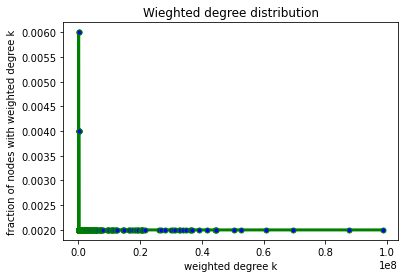

In [ ]:
#3rd(flights between airports)

#######################################################################
 # weigths of the data is large as it is the data of airport therefore degree is shown in fraction
##########################################################

import matplotlib.pyplot as plt
airport=open('airport.txt','r')
airportdata=airport.readlines()
s=[]
d=[]
w=[]
for i in airportdata:
    l=i.split(" ")
    ww.append(l)
    s.append(int(l[0]))
    d.append(int(l[1]))
    w.append(int(l[2]))
maxw=max(w)
adegree={}
ndegree={}
no=max(max(s),max(d))
ww=[[1]*(no+1)]*(no+1)
for i in airportdata:
    l=i.split(" ")
    ww[int(l[0])][int(l[1])]=int(l[2])
    ww[int(l[1])][int(l[0])]=int(l[2])
for i in s:
    if(i not in adegree):
        adegree[i]=0
        ndegree[i]=[]
for i in d:
    if(i not in adegree):
        adegree[i]=0
        ndegree[i]=[]
for i in range(0,len(s)):      #calculating wieghts
    adegree[s[i]]=adegree[s[i]]+w[i]
    adegree[d[i]]=adegree[d[i]]+w[i]
    ndegree[s[i]].append(d[i])
    ndegree[d[i]].append(s[i])
v=list(adegree.values())
finalw={}
for i in v:
    if(i in finalw):
        finalw[i]=finalw[i]+1
    else:
        finalw[i]=1
        
for i in finalw:
    finalw[i]=finalw[i]/no
f={}
for i in sorted(finalw.keys()):  #sorting for graph
    f[i]=finalw[i]
plt.plot(list(f.keys()), list(f.values()), color='green', linestyle='solid', linewidth = 3, marker='o', markerfacecolor='blue', markersize=5) 
plt.title('Wieghted degree distribution')
plt.xlabel('weighted degree k')
plt.ylabel('fraction of nodes with weighted degree k')
plt.show()

      To make the weighted degree of a node we need to sum all neighbouring edges of the of the node. 

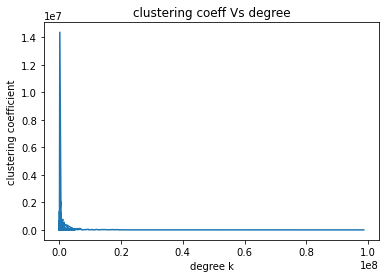

In [ ]:
#3rd b
#######################################################################
 # weigths of the data is large as it is the data of airport therefore degree is shown in fraction
##########################################################
def clustering(n,d,m,w):
    triangles = 0
    nbrs = d[n] 
    for u in nbrs:
        for v in nbrs:
            if u in d[v] and u!=v: 
                triangles +=(m[u][v]*m[n][u]*m[n][v])
    triangles=triangles/(w[n]*(w[n]-1))
    return triangles
ccoeff=[]
for i in range(1,no+1):
    ccoeff.append(clustering(i,ndegree,ww,adegree))
plt.plot(list(adegree.values()),ccoeff)
plt.title('clustering coeff Vs degree')
plt.xlabel('degree k')
plt.ylabel('clustering coefficient')
plt.show()


here the formula is applied where i find the triangle of the node with its neighbouring nodes then multiplied with the weights along those edges of the triangle then divide it by the weighted degree of the node.

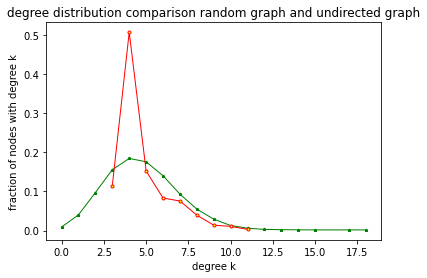

In [ ]:
#question 4 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

facebook=open('power.txt','r')
fb=facebook.readlines()
facebook.close()
sources=[]
destination=[]
for i in fb:
    l=i.split(" ")
    sources.append(int(l[0]))
    destination.append(int(l[1]))
ma=max(max(sources),max(destination))
unode={}
for i in sources:
    unode[i]=[]
for i in destination:
    unode[i]=[]

for i in range(0,len(sources)):
    unode[sources[i]].append(destination[i])
    unode[destination[i]].append(sources[i])
co=[]
for i in list(unode.keys()):
    co.append(len(unode[i]))
f={}
for i in co:
    if(i in f):
        f[i]=f[i]+1
    else:
        f[i]=1
for i in f:
    f[i]=f[i]/ma
nodes=ma+1
prob=(len(sources))/((nodes-1)*(nodes-2))      #probability value whether there is a edge or not
globald={}
for t in range(100):        ##loop to create 100 graphs 
    temp={}
    for i in range(nodes):
        temp[i+1]=[]
    for i in range(nodes):
        for j in range(nodes):
            if(i!=j):
                if random.random()<prob:          #condition checking to have edge or not
                    temp[i+1].append(j+1)
                    temp[j+1].append(i+1)
    count=[]
    for i in temp:
        count.append(len(temp[i]))
    freq={}
    for i in count:
        if(i in freq):
            freq[i]=freq[i]+1
        else:
            freq[i]=1
            
    for i in freq:
        freq[i]=freq[i]/ma
        
    for i in freq:
        if(i in globald):
            globald[i].append(freq[i])
        else:
            globald[i]=[freq[i]]
finald={}
for i in globald:
    l=len(globald[i])
    s=0
    for j in globald[i]:
        s+=j
    finald[i]=s/l

final={}
for i in sorted(finald.keys()):  #sorting for graph
    final[i]=finald[i]
finall={}
for i in sorted(f.keys()):  #sorting for graph
    finall[i]=f[i]

    ########  graph plotting ###########
plt.plot(list(final.keys()), list(final.values()), color='green', linestyle='solid', linewidth = 1, marker='*', markerfacecolor='yellow', markersize=3) 
plt.plot(list(finall.keys()), list(finall.values()), color='r', linestyle='solid', linewidth = 1, marker='o', markerfacecolor='yellow', markersize=3)
plt.xlabel('degree k')
plt.ylabel('fraction of nodes with degree k')
plt.title('degree distribution comparison random graph and undirected graph')
plt.show()


Here the real world graph plot is following the poisson distribution and Random graph is following the gaussian distribution.

from IPython.display import Image 
Image("img/picture.png")


Data facebook-combined: 

question 5:

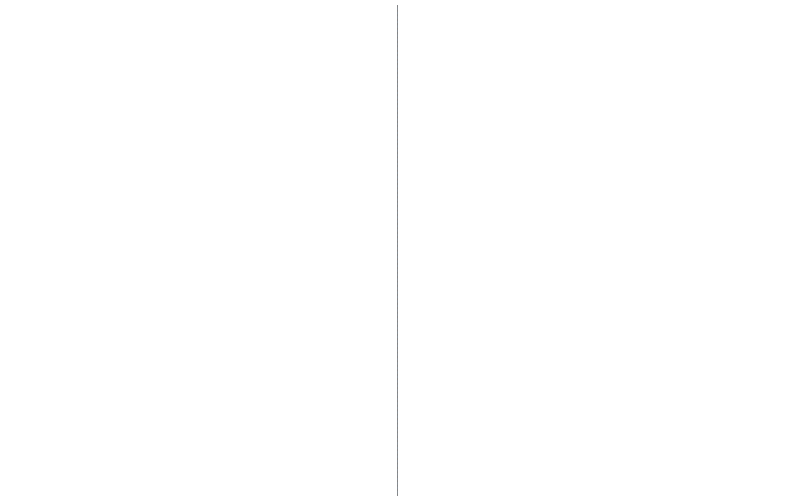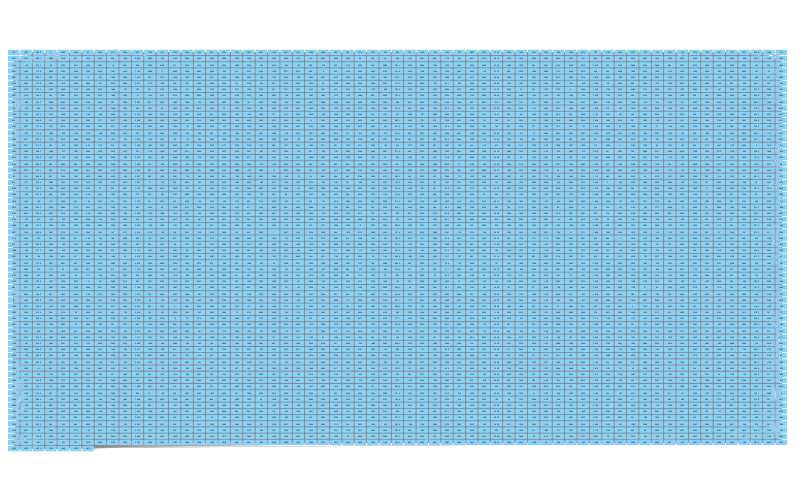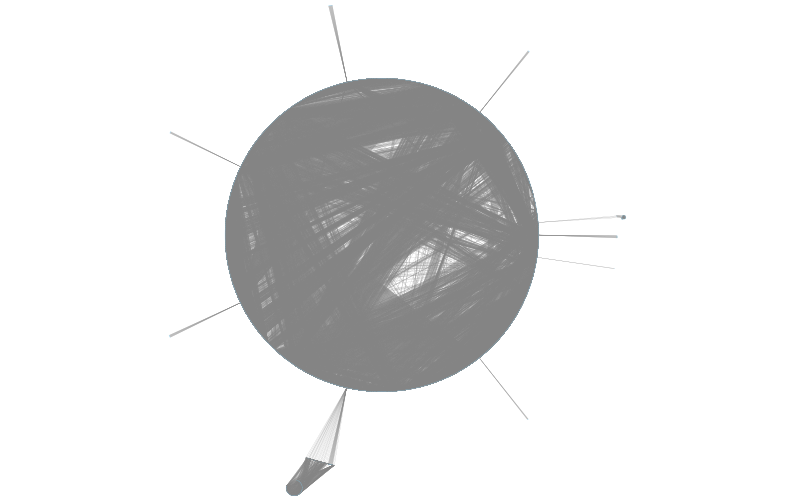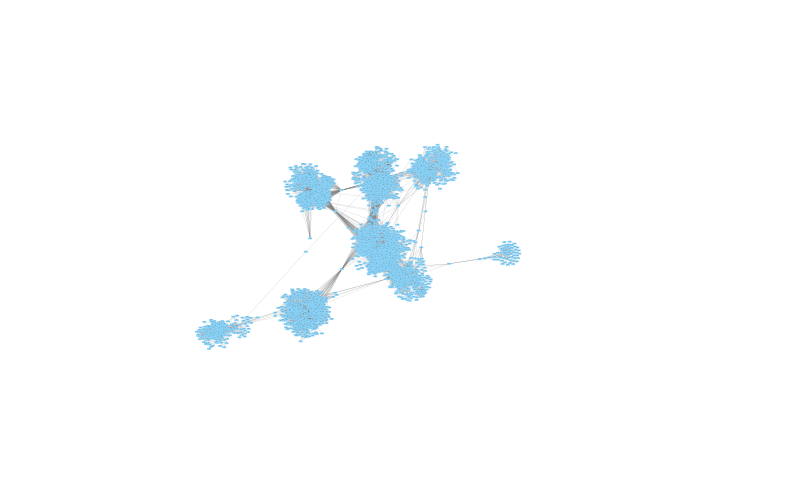

data Airport: 

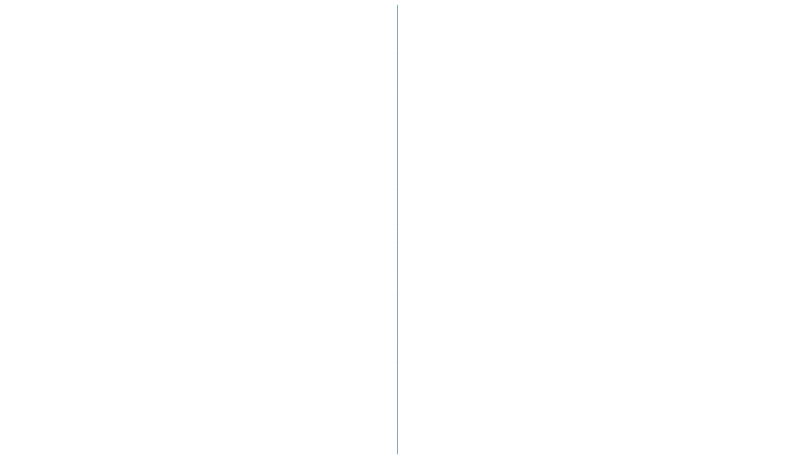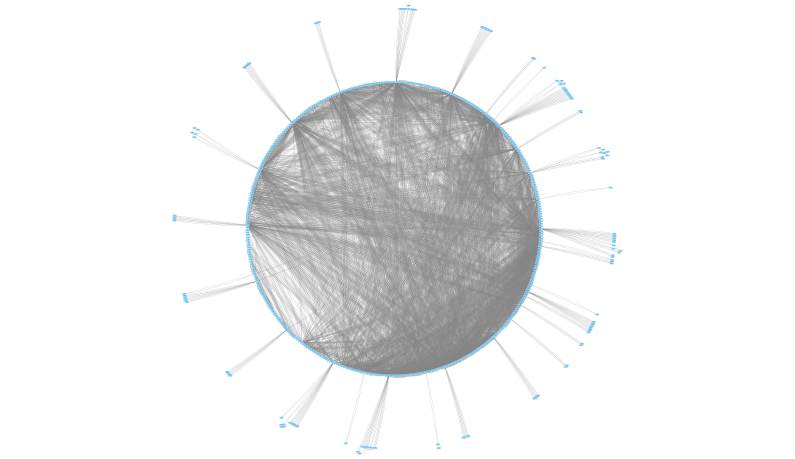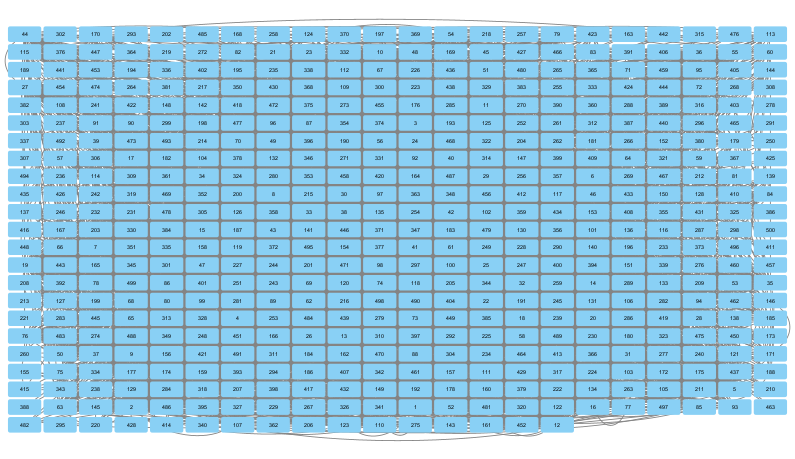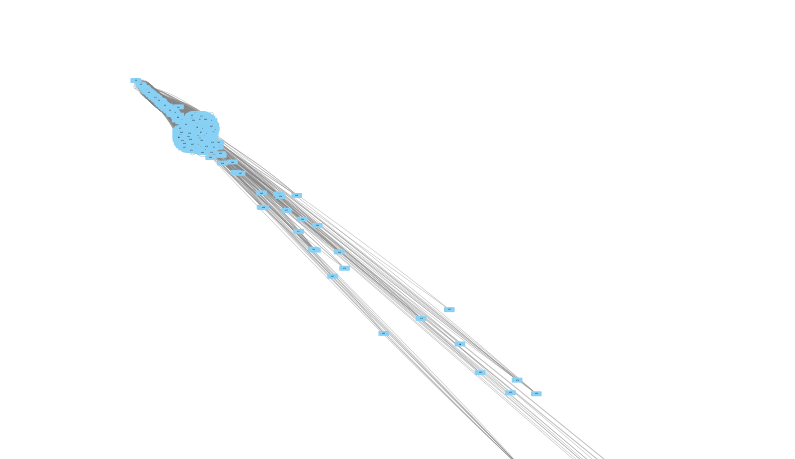

data p2p :
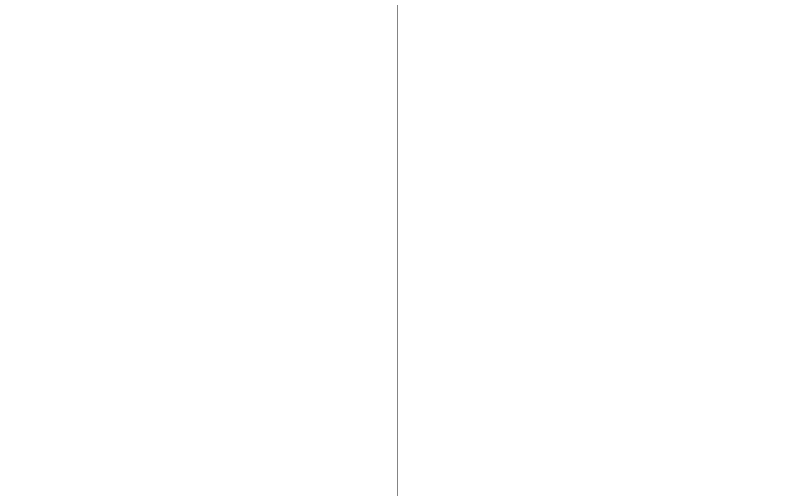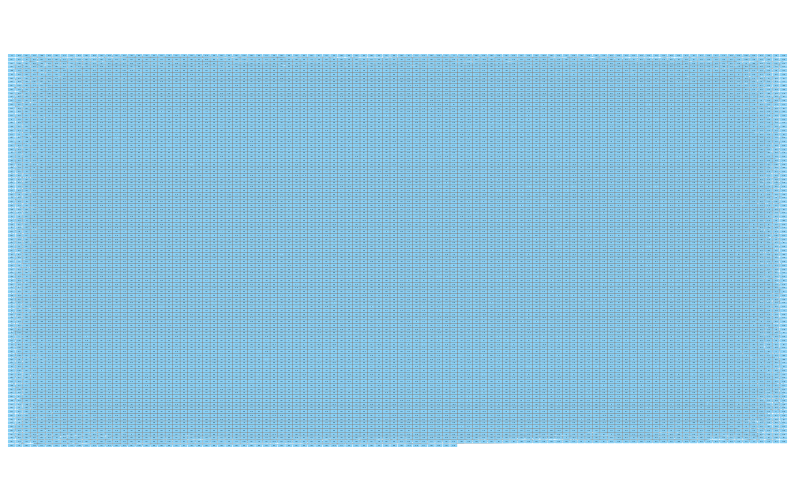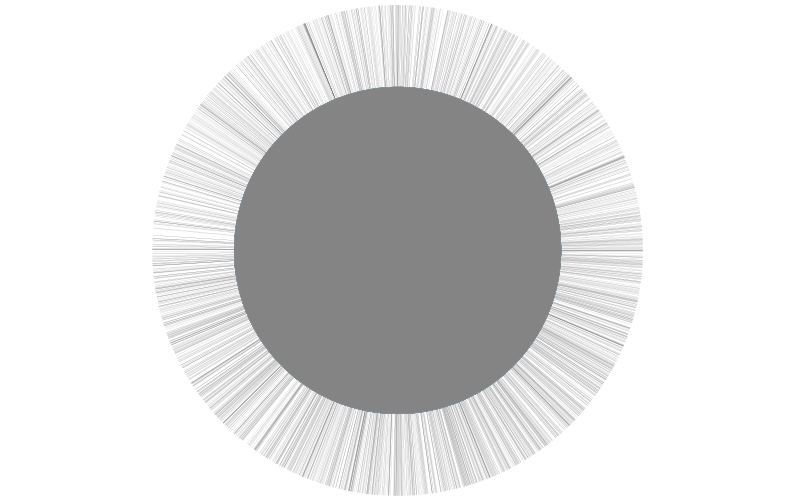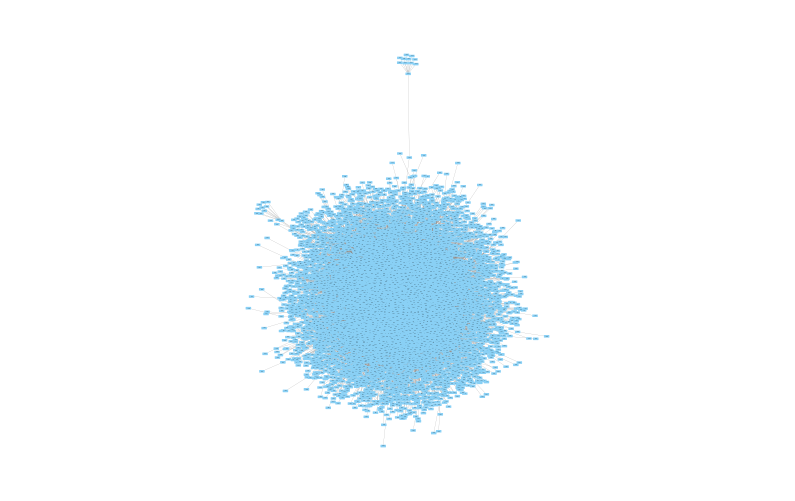

data :power
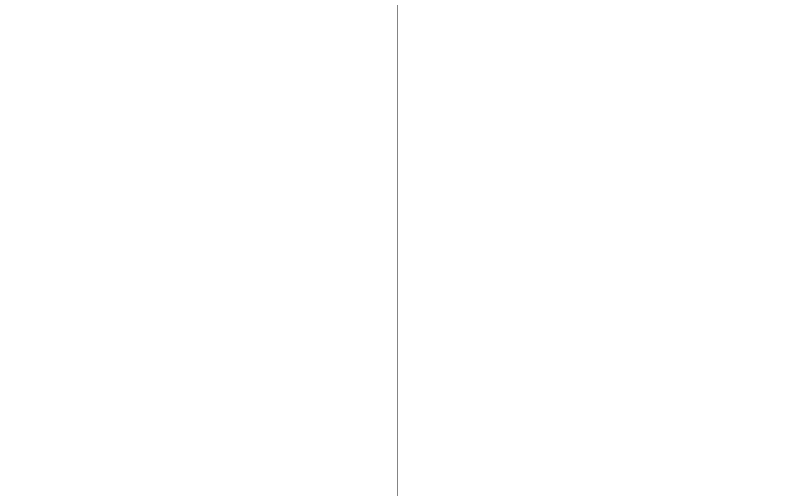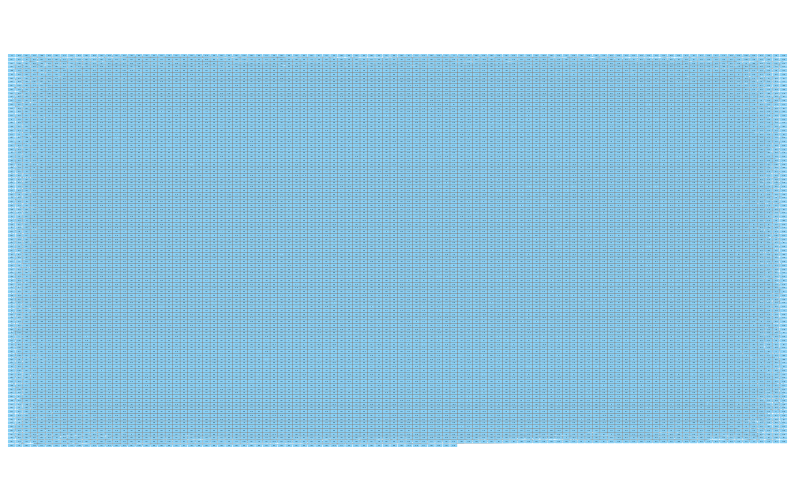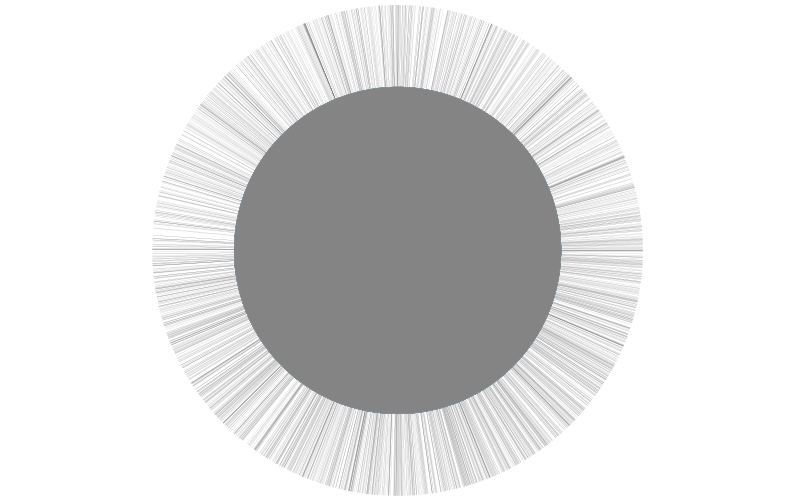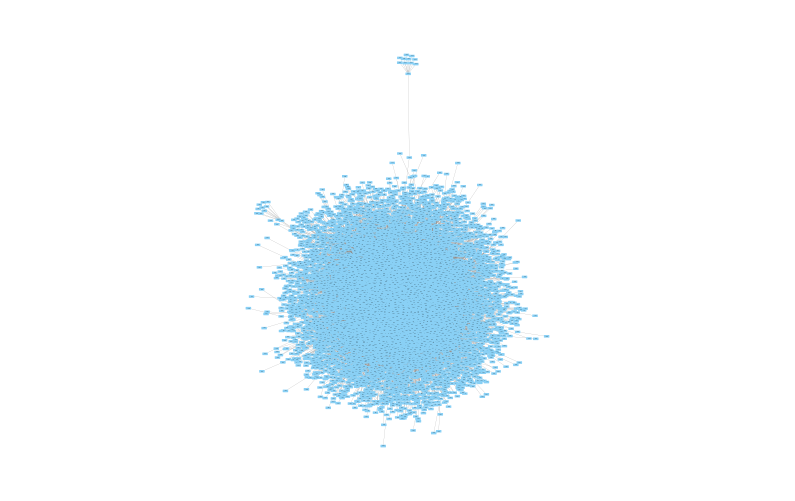